In [1]:
import numpy as np

In [5]:
mode = 4

data_directory = "../DATASET/mode_" + str(mode) + "/downsampling/"

X_train = np.load(data_directory + "X_train.npy")
y_train = np.load(data_directory + "y_train.npy")

X_val = np.load(data_directory + "X_val.npy")
y_val = np.load(data_directory + "y_val.npy")

X_test = np.load(data_directory + "X_test.npy")
y_test = np.load(data_directory + "y_test.npy")

In [6]:
X_train.shape, X_test.shape

((2578, 250, 2), (1090, 250, 2))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 250

model = Sequential()
model.add(Conv1D(64, 3, strides=1, activation='relu', input_shape=(seq_length, 2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, strides=1, activation='relu'))
model.add(MaxPooling1D(4))
model.add(Conv1D(128, 3, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 3, strides=1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=10, verbose=0, mode='auto')

callbacks_list = []
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=200, validation_data=(X_val, y_val), 
                    shuffle=True, callbacks = callbacks_list)

Train on 2578 samples, validate on 620 samples
Epoch 1/200
2578/2578 [==============================] - 3s 1ms/step - loss: 0.4722 - acc: 0.7785 - val_loss: 0.3865 - val_acc: 0.8290
Epoch 2/200
2578/2578 [==============================] - 1s 227us/step - loss: 0.4256 - acc: 0.8169 - val_loss: 0.4189 - val_acc: 0.8274
Epoch 3/200
2578/2578 [==============================] - 1s 229us/step - loss: 0.4087 - acc: 0.8254 - val_loss: 0.3939 - val_acc: 0.8177
Epoch 4/200
2578/2578 [==============================] - 1s 227us/step - loss: 0.4050 - acc: 0.8320 - val_loss: 0.4449 - val_acc: 0.8339
Epoch 5/200
2578/2578 [==============================] - 1s 227us/step - loss: 0.3855 - acc: 0.8359 - val_loss: 0.9428 - val_acc: 0.6048
Epoch 6/200
2578/2578 [==============================] - 1s 228us/step - loss: 0.3780 - acc: 0.8394 - val_loss: 0.4569 - val_acc: 0.8242
Epoch 7/200
2578/2578 [==============================] - 1s 239us/step - loss: 0.3846 - acc: 0.8340 - val_loss: 0.4710 - val_acc: 0.8

2578/2578 [==============================] - 1s 214us/step - loss: 0.2579 - acc: 0.8848 - val_loss: 0.3938 - val_acc: 0.8452
Epoch 61/200
2578/2578 [==============================] - 1s 214us/step - loss: 0.2497 - acc: 0.8898 - val_loss: 0.4282 - val_acc: 0.8742
Epoch 62/200
2578/2578 [==============================] - 1s 224us/step - loss: 0.2566 - acc: 0.8751 - val_loss: 0.3542 - val_acc: 0.8710
Epoch 63/200
2578/2578 [==============================] - 1s 225us/step - loss: 0.2541 - acc: 0.8856 - val_loss: 0.3396 - val_acc: 0.8790
Epoch 64/200
2578/2578 [==============================] - 1s 214us/step - loss: 0.2571 - acc: 0.8856 - val_loss: 0.3712 - val_acc: 0.8710
Epoch 65/200
2578/2578 [==============================] - 1s 214us/step - loss: 0.2516 - acc: 0.8863 - val_loss: 0.5016 - val_acc: 0.8565
Epoch 66/200
2578/2578 [==============================] - 1s 214us/step - loss: 0.2495 - acc: 0.8933 - val_loss: 0.3413 - val_acc: 0.8565
Epoch 67/200
2578/2578 [=======================

2578/2578 [==============================] - 1s 213us/step - loss: 0.2292 - acc: 0.8976 - val_loss: 0.6622 - val_acc: 0.8161
Epoch 120/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2317 - acc: 0.9011 - val_loss: 0.4104 - val_acc: 0.8823
Epoch 121/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2156 - acc: 0.9034 - val_loss: 0.5935 - val_acc: 0.8581
Epoch 122/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2144 - acc: 0.9022 - val_loss: 0.4035 - val_acc: 0.8565
Epoch 123/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2186 - acc: 0.9019 - val_loss: 0.8390 - val_acc: 0.8435
Epoch 124/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2164 - acc: 0.9011 - val_loss: 0.4115 - val_acc: 0.8790
Epoch 125/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2261 - acc: 0.8980 - val_loss: 0.4541 - val_acc: 0.8452
Epoch 126/200
2578/2578 [================

2578/2578 [==============================] - 1s 212us/step - loss: 0.1924 - acc: 0.9131 - val_loss: 0.6884 - val_acc: 0.8903
Epoch 179/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.1899 - acc: 0.9213 - val_loss: 0.5828 - val_acc: 0.8887
Epoch 180/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.2006 - acc: 0.9189 - val_loss: 0.9791 - val_acc: 0.8484
Epoch 181/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.1849 - acc: 0.9162 - val_loss: 0.4733 - val_acc: 0.8694
Epoch 182/200
2578/2578 [==============================] - 1s 212us/step - loss: 0.1869 - acc: 0.9201 - val_loss: 0.4767 - val_acc: 0.8661
Epoch 183/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.1900 - acc: 0.9170 - val_loss: 0.4313 - val_acc: 0.8710
Epoch 184/200
2578/2578 [==============================] - 1s 213us/step - loss: 0.1856 - acc: 0.9162 - val_loss: 0.5523 - val_acc: 0.8823
Epoch 185/200
2578/2578 [================

In [40]:
score = model.evaluate(X_val, y_val, verbose=1, batch_size=16)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

620/620 [==============================] - 0s 387us/step
Validation loss: 0.5537229746339782
Validation accuracy: 0.8774193544541636


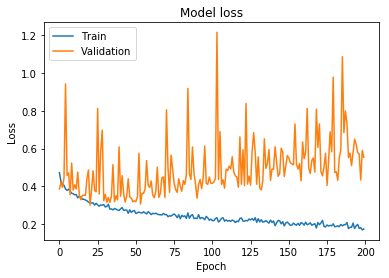

In [41]:
import matplotlib.pyplot as plt 

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
from sklearn.metrics import recall_score, precision_score, fbeta_score

def best_threshold(X_val, y_val):
    predictions = model.predict(X_val)
    
    best_f2 = 0
    for thresh in np.linspace(0.01, 0.99, 100):
        y_val_predict = (predictions > thresh).astype(np.uint8)
        f2 = fbeta_score(y_val, y_val_predict, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_thresh = thresh
    return best_thresh

threshold = best_threshold(X_val, y_val)
y_val_predict = (model.predict(X_val) > threshold).astype(np.uint8)  

print("Validation: ")
print("Threshold: ", threshold)
print("Precision: \t", precision_score(y_val, y_val_predict))
print("Recall: \t", recall_score(y_val, y_val_predict))
print("F2: \t\t", fbeta_score(y_val, y_val_predict, beta=2))

Validation: 
Threshold:  0.059494949494949496
Precision: 	 0.7236024844720497
Recall: 	 0.9433198380566802
F2: 		 0.8893129770992366


In [43]:
model.save("Models/mode_" + str(mode) + "/conv1D.h5")

In [45]:
from keras.utils import plot_model
plot_model(model, to_file='model_mode4.png') 

In [46]:
# TEST
y_test_predict = (model.predict(X_test) > threshold).astype(np.uint8) 
print("TEST: ")
print("Threshold: ", threshold)
print("Precision: \t", precision_score(y_test, y_test_predict))
print("Recall: \t", recall_score(y_test, y_test_predict))
print("F2: \t\t", fbeta_score(y_test, y_test_predict, beta=2))

TEST: 
Threshold:  0.059494949494949496
Precision: 	 0.7211703958691911
Recall: 	 0.9394618834080718
F2: 		 0.8858350951374208
